In [1]:
#import this before other imports
from sklearnex import patch_sklearn,unpatch_sklearn

patch_sklearn()
#unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from pyrqa.computation import RPComputation
from pyrqa.image_generator import ImageGenerator
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from PIL import Image 
import itertools

In [4]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
import cv2
import seaborn as sns
from matplotlib import pyplot
from keras import models
from sklearn.metrics import confusion_matrix

In [5]:
train = pd.read_csv("train_set.csv")
train

,url,result
0,http://player.polyv.net/videos/3ee850a192d81e2...,2
1,http://www.hmaca.com/winnipeg-accounting-blog,1
2,http://www.generalcustom.com.br/index.php?opti...,1
3,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
4,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
132287,http://masterstrans.com/component/contact/1,1
132288,http://www.tvmiros.gr/parousiasi-tou-sxediou-m...,1
132289,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
132290,http://schertzauto.com/wp-content/themes/NAPA%...,2


In [6]:
valid = pd.read_csv("valid_set.csv")
valid

,url,result
0,http://jmrsl.net/index.php?option=com_jevents&...,1
1,http://www.ekwdesign.de/referenzen/corporate-d...,1
2,http://img25.artxun.com/sdd/oldimg/5dfd/5dfd94...,2
3,http://yourdayyourbudget.com/index.php?option=...,1
4,http://www.modconsolas.com/portal/index.php?li...,1
...,...,...
16532,http://bisaneema.org/%e0%a4%87%e0%a4%a4%e0%a4%...,2
16533,http://drogheriapreti.com/chi-siamo.html,1
16534,http://otomoto.pl/oferta/renault-trafic-zareje...,0
16535,http://www.bishopstrings.com/violins/ยฃ5000-ยฃ...,1


In [7]:
test = pd.read_csv("test_set.csv")
test

,url,result
0,http://www.jin0044.com/cl/?module=System&metho...,2
1,http://bjgdhm.com/show_products.asp?id=433,1
2,http://www.masseny.de/index.php?option=com_pho...,1
3,http://maybank2u.com.my/mbb_info/m2u/public/pe...,0
4,http://yourlust.com/videos/picked-up-whore-kar...,0
...,...,...
16532,http://www.lisambiental.com.br/x.txt,1
16533,http://pflegeheim-lausitz.de/index.php?option=...,1
16534,http://www.shekinahphotography.co.za/index.php...,1
16535,http://wddga.com/index.html?limitstart=20&font...,1


In [8]:
data=[train,valid,test]
urls = pd.concat(data, ignore_index=True)

In [10]:
urls

,url,result
0,http://player.polyv.net/videos/3ee850a192d81e2...,2
1,http://www.hmaca.com/winnipeg-accounting-blog,1
2,http://www.generalcustom.com.br/index.php?opti...,1
3,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
4,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
165361,http://www.lisambiental.com.br/x.txt,1
165362,http://pflegeheim-lausitz.de/index.php?option=...,1
165363,http://www.shekinahphotography.co.za/index.php...,1
165364,http://wddga.com/index.html?limitstart=20&font...,1


In [11]:
vectorizer = CountVectorizer(analyzer='char')
mean_vec = vectorizer.fit_transform(urls['url'])
mean_vec.shape

(165366, 133)

In [17]:
ex = mean_vec[0].todense()
data_points = ex.tolist()[0]
time_series = TimeSeries(data_points,embedding_dimension=2,time_delay=1)
settings = Settings(time_series,analysis_type=Classic,neighbourhood=FixedRadius(0.65),similarity_measure=EuclideanMetric,theiler_corrector=1)
computation = RQAComputation.create(settings)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_length = 2
computation = RPComputation.create(settings)
result = computation.run()
ImageGenerator.save_recurrence_plot(result.recurrence_matrix_reverse,'train.png')

In [18]:
im1 = Image.open('train.png').convert('L')
im1 = np.stack((im1,)*3, axis=-1)
im1.shape

(132, 132, 3)

In [23]:
train_array = []
for i in range(0,165366):
    ex = mean_vec[i].todense()
    data_points = ex.tolist()[0]
    time_series = TimeSeries(data_points,embedding_dimension=2,time_delay=1)
    settings = Settings(time_series,analysis_type=Classic,neighbourhood=FixedRadius(0.65),similarity_measure=EuclideanMetric,theiler_corrector=1)
    computation = RQAComputation.create(settings)
    result = computation.run()
    result.min_diagonal_line_length = 2
    result.min_vertical_line_length = 2
    result.min_white_vertical_line_length = 2
    computation = RPComputation.create(settings)
    result = computation.run()
    ImageGenerator.save_recurrence_plot(result.recurrence_matrix_reverse,'train.png')
    im1 = Image.open('train.png').convert('L')
    im1 = np.stack((im1,)*3, axis=-1)
    train_array.append(im1)
    if i%1000==0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000


KeyboardInterrupt: 

In [24]:
len(train_array)

113497

In [26]:
train_array1 = []
for i in range(113497,135366):
    ex = mean_vec[i].todense()
    data_points = ex.tolist()[0]
    time_series = TimeSeries(data_points,embedding_dimension=2,time_delay=1)
    settings = Settings(time_series,analysis_type=Classic,neighbourhood=FixedRadius(0.65),similarity_measure=EuclideanMetric,theiler_corrector=1)
    computation = RQAComputation.create(settings)
    result = computation.run()
    result.min_diagonal_line_length = 2
    result.min_vertical_line_length = 2
    result.min_white_vertical_line_length = 2
    computation = RPComputation.create(settings)
    result = computation.run()
    ImageGenerator.save_recurrence_plot(result.recurrence_matrix_reverse,'train.png')
    im1 = Image.open('train.png').convert('L')
    im1 = np.stack((im1,)*3, axis=-1)
    train_array1.append(im1)
    if i%3==0:
        print(i)

113499
113502
113505
113508
113511
113514
113517
113520
113523
113526
113529
113532
113535
113538
113541
113544
113547
113550
113553
113556
113559
113562
113565
113568
113571
113574
113577
113580
113583
113586
113589
113592
113595
113598
113601
113604
113607
113610
113613
113616
113619
113622
113625
113628
113631
113634
113637
113640
113643
113646
113649
113652
113655
113658
113661
113664
113667
113670
113673
113676
113679
113682
113685
113688
113691
113694
113697
113700
113703
113706
113709
113712
113715
113718
113721
113724
113727
113730
113733
113736
113739
113742
113745
113748
113751
113754
113757
113760
113763
113766
113769
113772
113775
113778
113781
113784
113787
113790
113793
113796
113799
113802
113805
113808
113811
113814
113817
113820
113823
113826
113829
113832
113835
113838
113841
113844
113847
113850
113853
113856
113859
113862
113865
113868
113871
113874
113877
113880
113883
113886
113889
113892
113895
113898
113901
113904
113907
113910
113913
113916
113919
113922
113925

117012
117015
117018
117021
117024
117027
117030
117033
117036
117039
117042
117045
117048
117051
117054
117057
117060
117063
117066
117069
117072
117075
117078
117081
117084
117087
117090
117093
117096
117099
117102
117105
117108
117111
117114
117117
117120
117123
117126
117129
117132
117135
117138
117141
117144
117147
117150
117153
117156
117159
117162
117165
117168
117171
117174
117177
117180
117183
117186
117189
117192
117195
117198
117201
117204
117207
117210
117213
117216
117219
117222
117225
117228
117231
117234
117237
117240
117243
117246
117249
117252
117255
117258
117261
117264
117267
117270
117273
117276
117279
117282
117285
117288
117291
117294
117297
117300
117303
117306
117309
117312
117315
117318
117321
117324
117327
117330
117333
117336
117339
117342
117345
117348
117351
117354
117357
117360
117363
117366
117369
117372
117375
117378
117381
117384
117387
117390
117393
117396
117399
117402
117405
117408
117411
117414
117417
117420
117423
117426
117429
117432
117435
117438

120525
120528
120531
120534
120537
120540
120543
120546
120549
120552
120555
120558
120561
120564
120567
120570
120573
120576
120579
120582
120585
120588
120591
120594
120597
120600
120603
120606
120609
120612
120615
120618
120621
120624
120627
120630
120633
120636
120639
120642
120645
120648
120651
120654
120657
120660
120663
120666
120669
120672
120675
120678
120681
120684
120687
120690
120693
120696
120699
120702
120705
120708
120711
120714
120717
120720
120723
120726
120729
120732
120735
120738
120741
120744
120747
120750
120753
120756
120759
120762
120765
120768
120771
120774
120777
120780
120783
120786
120789
120792
120795
120798
120801
120804
120807
120810
120813
120816
120819
120822
120825
120828
120831
120834
120837
120840
120843
120846
120849
120852
120855
120858
120861
120864
120867
120870
120873
120876
120879
120882
120885
120888
120891
120894
120897
120900
120903
120906
120909
120912
120915
120918
120921
120924
120927
120930
120933
120936
120939
120942
120945
120948
120951

124038
124041
124044
124047
124050
124053
124056
124059
124062
124065
124068
124071
124074
124077
124080
124083
124086
124089
124092
124095
124098
124101
124104
124107
124110
124113
124116
124119
124122
124125
124128
124131
124134
124137
124140
124143
124146
124149
124152
124155
124158
124161
124164
124167
124170
124173
124176
124179
124182
124185
124188
124191
124194
124197
124200
124203
124206
124209
124212
124215
124218
124221
124224
124227
124230
124233
124236
124239
124242
124245
124248
124251
124254
124257
124260
124263
124266
124269
124272
124275
124278
124281
124284
124287
124290
124293
124296
124299
124302
124305
124308
124311
124314
124317
124320
124323
124326
124329
124332
124335
124338
124341
124344
124347
124350
124353
124356
124359
124362
124365
124368
124371
124374
124377
124380
124383
124386
124389
124392
124395
124398
124401
124404
124407
124410
124413
124416
124419
124422
124425
124428
124431
124434
124437
124440
124443
124446
124449
124452
124455
124458
124461
124464

127551
127554
127557
127560
127563
127566
127569
127572
127575
127578
127581
127584
127587
127590
127593
127596
127599
127602
127605
127608
127611
127614
127617
127620
127623
127626
127629
127632
127635
127638
127641
127644
127647
127650
127653
127656
127659
127662
127665
127668
127671
127674
127677
127680
127683
127686
127689
127692
127695
127698
127701
127704
127707
127710
127713
127716
127719
127722
127725
127728
127731
127734
127737
127740
127743
127746
127749
127752
127755
127758
127761
127764
127767
127770
127773
127776
127779
127782
127785
127788
127791
127794
127797
127800
127803
127806
127809
127812
127815
127818
127821
127824
127827
127830
127833
127836
127839
127842
127845
127848
127851
127854
127857
127860
127863
127866
127869
127872
127875
127878
127881
127884
127887
127890
127893
127896
127899
127902
127905
127908
127911
127914
127917
127920
127923
127926
127929
127932
127935
127938
127941
127944
127947
127950
127953
127956
127959
127962
127965
127968
127971
127974
127977

131064
131067
131070
131073
131076
131079
131082
131085
131088
131091
131094
131097
131100
131103
131106
131109
131112
131115
131118
131121
131124
131127
131130
131133
131136
131139
131142
131145
131148
131151
131154
131157
131160
131163
131166
131169
131172
131175
131178
131181
131184
131187
131190
131193
131196
131199
131202
131205
131208
131211
131214
131217
131220
131223
131226
131229
131232
131235
131238
131241
131244
131247
131250
131253
131256
131259
131262
131265
131268
131271
131274
131277
131280
131283
131286
131289
131292
131295
131298
131301
131304
131307
131310
131313
131316
131319
131322
131325
131328
131331
131334
131337
131340
131343
131346
131349
131352
131355
131358
131361
131364
131367
131370
131373
131376
131379
131382
131385
131388
131391
131394
131397
131400
131403
131406
131409
131412
131415
131418
131421
131424
131427
131430
131433
131436
131439
131442
131445
131448
131451
131454
131457
131460
131463
131466
131469
131472
131475
131478
131481
131484
131487
131490

134577
134580
134583
134586
134589
134592
134595
134598
134601
134604
134607
134610
134613
134616
134619
134622
134625
134628
134631
134634
134637
134640
134643
134646
134649
134652
134655
134658
134661
134664
134667
134670
134673
134676
134679
134682
134685
134688
134691
134694
134697
134700
134703
134706
134709
134712
134715
134718
134721
134724
134727
134730
134733
134736
134739
134742
134745
134748
134751
134754
134757
134760
134763
134766
134769
134772
134775
134778
134781
134784
134787
134790
134793
134796
134799
134802
134805
134808
134811
134814
134817
134820
134823
134826
134829
134832
134835
134838
134841
134844
134847
134850
134853
134856
134859
134862
134865
134868
134871
134874
134877
134880
134883
134886
134889
134892
134895
134898
134901
134904
134907
134910
134913
134916
134919
134922
134925
134928
134931
134934
134937
134940
134943
134946
134949
134952
134955
134958
134961
134964
134967
134970
134973
134976
134979
134982
134985
134988
134991
134994
134997
135000
135003

In [27]:
len(train_array1)

21869

In [28]:
train_array2 = []
for i in range(135366,155366):
    ex = mean_vec[i].todense()
    data_points = ex.tolist()[0]
    time_series = TimeSeries(data_points,embedding_dimension=2,time_delay=1)
    settings = Settings(time_series,analysis_type=Classic,neighbourhood=FixedRadius(0.65),similarity_measure=EuclideanMetric,theiler_corrector=1)
    computation = RQAComputation.create(settings)
    result = computation.run()
    result.min_diagonal_line_length = 2
    result.min_vertical_line_length = 2
    result.min_white_vertical_line_length = 2
    computation = RPComputation.create(settings)
    result = computation.run()
    ImageGenerator.save_recurrence_plot(result.recurrence_matrix_reverse,'train.png')
    im1 = Image.open('train.png').convert('L')
    im1 = np.stack((im1,)*3, axis=-1)
    train_array2.append(im1)
    if i%3==0:
        print(i)

135366
135369
135372
135375
135378
135381
135384
135387
135390
135393
135396
135399
135402
135405
135408
135411
135414
135417
135420
135423
135426
135429
135432
135435
135438
135441
135444
135447
135450
135453
135456
135459
135462
135465
135468
135471
135474
135477
135480
135483
135486
135489
135492
135495
135498
135501
135504
135507
135510
135513
135516
135519
135522
135525
135528
135531
135534
135537
135540
135543
135546
135549
135552
135555
135558
135561
135564
135567
135570
135573
135576
135579
135582
135585
135588
135591
135594
135597
135600
135603
135606
135609
135612
135615
135618
135621
135624
135627
135630
135633
135636
135639
135642
135645
135648
135651
135654
135657
135660
135663
135666
135669
135672
135675
135678
135681
135684
135687
135690
135693
135696
135699
135702
135705
135708
135711
135714
135717
135720
135723
135726
135729
135732
135735
135738
135741
135744
135747
135750
135753
135756
135759
135762
135765
135768
135771
135774
135777
135780
135783
135786
135789
135792

138879
138882
138885
138888
138891
138894
138897
138900
138903
138906
138909
138912
138915
138918
138921
138924
138927
138930
138933
138936
138939
138942
138945
138948
138951
138954
138957
138960
138963
138966
138969
138972
138975
138978
138981
138984
138987
138990
138993
138996
138999
139002
139005
139008
139011
139014
139017
139020
139023
139026
139029
139032
139035
139038
139041
139044
139047
139050
139053
139056
139059
139062
139065
139068
139071
139074
139077
139080
139083
139086
139089
139092
139095
139098
139101
139104
139107
139110
139113
139116
139119
139122
139125
139128
139131
139134
139137
139140
139143
139146
139149
139152
139155
139158
139161
139164
139167
139170
139173
139176
139179
139182
139185
139188
139191
139194
139197
139200
139203
139206
139209
139212
139215
139218
139221
139224
139227
139230
139233
139236
139239
139242
139245
139248
139251
139254
139257
139260
139263
139266
139269
139272
139275
139278
139281
139284
139287
139290
139293
139296
139299
139302
139305

142392
142395
142398
142401
142404
142407
142410
142413
142416
142419
142422
142425
142428
142431
142434
142437
142440
142443
142446
142449
142452
142455
142458
142461
142464
142467
142470
142473
142476
142479
142482
142485
142488
142491
142494
142497
142500
142503
142506
142509
142512
142515
142518
142521
142524
142527
142530
142533
142536
142539
142542
142545
142548
142551
142554
142557
142560
142563
142566
142569
142572
142575
142578
142581
142584
142587
142590
142593
142596
142599
142602
142605
142608
142611
142614
142617
142620
142623
142626
142629
142632
142635
142638
142641
142644
142647
142650
142653
142656
142659
142662
142665
142668
142671
142674
142677
142680
142683
142686
142689
142692
142695
142698
142701
142704
142707
142710
142713
142716
142719
142722
142725
142728
142731
142734
142737
142740
142743
142746
142749
142752
142755
142758
142761
142764
142767
142770
142773
142776
142779
142782
142785
142788
142791
142794
142797
142800
142803
142806
142809
142812
142815
142818

145905
145908
145911
145914
145917
145920
145923
145926
145929
145932
145935
145938
145941
145944
145947
145950
145953
145956
145959
145962
145965
145968
145971
145974
145977
145980
145983
145986
145989
145992
145995
145998
146001
146004
146007
146010
146013
146016
146019
146022
146025
146028
146031
146034
146037
146040
146043
146046
146049
146052
146055
146058
146061
146064
146067
146070
146073
146076
146079
146082
146085
146088
146091
146094
146097
146100
146103
146106
146109
146112
146115
146118
146121
146124
146127
146130
146133
146136
146139
146142
146145
146148
146151
146154
146157
146160
146163
146166
146169
146172
146175
146178
146181
146184
146187
146190
146193
146196
146199
146202
146205
146208
146211
146214
146217
146220
146223
146226
146229
146232
146235
146238
146241
146244
146247
146250
146253
146256
146259
146262
146265
146268
146271
146274
146277
146280
146283
146286
146289
146292
146295
146298
146301
146304
146307
146310
146313
146316
146319
146322
146325
146328
146331

149418
149421
149424
149427
149430
149433
149436
149439
149442
149445
149448
149451
149454
149457
149460
149463
149466
149469
149472
149475
149478
149481
149484
149487
149490
149493
149496
149499
149502
149505
149508
149511
149514
149517
149520
149523
149526
149529
149532
149535
149538
149541
149544
149547
149550
149553
149556
149559
149562
149565
149568
149571
149574
149577
149580
149583
149586
149589
149592
149595
149598
149601
149604
149607
149610
149613
149616
149619
149622
149625
149628
149631
149634
149637
149640
149643
149646
149649
149652
149655
149658
149661
149664
149667
149670
149673
149676
149679
149682
149685
149688
149691
149694
149697
149700
149703
149706
149709
149712
149715
149718
149721
149724
149727
149730
149733
149736
149739
149742
149745
149748
149751
149754
149757
149760
149763
149766
149769
149772
149775
149778
149781
149784
149787
149790
149793
149796
149799
149802
149805
149808
149811
149814
149817
149820
149823
149826
149829
149832
149835
149838
149841
149844

152931
152934
152937
152940
152943
152946
152949
152952
152955
152958
152961
152964
152967
152970
152973
152976
152979
152982
152985
152988
152991
152994
152997
153000
153003
153006
153009
153012
153015
153018
153021
153024
153027
153030
153033
153036
153039
153042
153045
153048
153051
153054
153057
153060
153063
153066
153069
153072
153075
153078
153081
153084
153087
153090
153093
153096
153099
153102
153105
153108
153111
153114
153117
153120
153123
153126
153129
153132
153135
153138
153141
153144
153147
153150
153153
153156
153159
153162
153165
153168
153171
153174
153177
153180
153183
153186
153189
153192
153195
153198
153201
153204
153207
153210
153213
153216
153219
153222
153225
153228
153231
153234
153237
153240
153243
153246
153249
153252
153255
153258
153261
153264
153267
153270
153273
153276
153279
153282
153285
153288
153291
153294
153297
153300
153303
153306
153309
153312
153315
153318
153321
153324
153327
153330
153333
153336
153339
153342
153345
153348
153351
153354
153357

In [29]:
len(train_array2)

20000

In [30]:
train_array3 = []
for i in range(155366,165366):
    ex = mean_vec[i].todense()
    data_points = ex.tolist()[0]
    time_series = TimeSeries(data_points,embedding_dimension=2,time_delay=1)
    settings = Settings(time_series,analysis_type=Classic,neighbourhood=FixedRadius(0.65),similarity_measure=EuclideanMetric,theiler_corrector=1)
    computation = RQAComputation.create(settings)
    result = computation.run()
    result.min_diagonal_line_length = 2
    result.min_vertical_line_length = 2
    result.min_white_vertical_line_length = 2
    computation = RPComputation.create(settings)
    result = computation.run()
    ImageGenerator.save_recurrence_plot(result.recurrence_matrix_reverse,'train.png')
    im1 = Image.open('train.png').convert('L')
    im1 = np.stack((im1,)*3, axis=-1)
    train_array3.append(im1)
    if i%3==0:
        print(i)

155367
155370
155373
155376
155379
155382
155385
155388
155391
155394
155397
155400
155403
155406
155409
155412
155415
155418
155421
155424
155427
155430
155433
155436
155439
155442
155445
155448
155451
155454
155457
155460
155463
155466
155469
155472
155475
155478
155481
155484
155487
155490
155493
155496
155499
155502
155505
155508
155511
155514
155517
155520
155523
155526
155529
155532
155535
155538
155541
155544
155547
155550
155553
155556
155559
155562
155565
155568
155571
155574
155577
155580
155583
155586
155589
155592
155595
155598
155601
155604
155607
155610
155613
155616
155619
155622
155625
155628
155631
155634
155637
155640
155643
155646
155649
155652
155655
155658
155661
155664
155667
155670
155673
155676
155679
155682
155685
155688
155691
155694
155697
155700
155703
155706
155709
155712
155715
155718
155721
155724
155727
155730
155733
155736
155739
155742
155745
155748
155751
155754
155757
155760
155763
155766
155769
155772
155775
155778
155781
155784
155787
155790
155793

158880
158883
158886
158889
158892
158895
158898
158901
158904
158907
158910
158913
158916
158919
158922
158925
158928
158931
158934
158937
158940
158943
158946
158949
158952
158955
158958
158961
158964
158967
158970
158973
158976
158979
158982
158985
158988
158991
158994
158997
159000
159003
159006
159009
159012
159015
159018
159021
159024
159027
159030
159033
159036
159039
159042
159045
159048
159051
159054
159057
159060
159063
159066
159069
159072
159075
159078
159081
159084
159087
159090
159093
159096
159099
159102
159105
159108
159111
159114
159117
159120
159123
159126
159129
159132
159135
159138
159141
159144
159147
159150
159153
159156
159159
159162
159165
159168
159171
159174
159177
159180
159183
159186
159189
159192
159195
159198
159201
159204
159207
159210
159213
159216
159219
159222
159225
159228
159231
159234
159237
159240
159243
159246
159249
159252
159255
159258
159261
159264
159267
159270
159273
159276
159279
159282
159285
159288
159291
159294
159297
159300
159303
159306

162393
162396
162399
162402
162405
162408
162411
162414
162417
162420
162423
162426
162429
162432
162435
162438
162441
162444
162447
162450
162453
162456
162459
162462
162465
162468
162471
162474
162477
162480
162483
162486
162489
162492
162495
162498
162501
162504
162507
162510
162513
162516
162519
162522
162525
162528
162531
162534
162537
162540
162543
162546
162549
162552
162555
162558
162561
162564
162567
162570
162573
162576
162579
162582
162585
162588
162591
162594
162597
162600
162603
162606
162609
162612
162615
162618
162621
162624
162627
162630
162633
162636
162639
162642
162645
162648
162651
162654
162657
162660
162663
162666
162669
162672
162675
162678
162681
162684
162687
162690
162693
162696
162699
162702
162705
162708
162711
162714
162717
162720
162723
162726
162729
162732
162735
162738
162741
162744
162747
162750
162753
162756
162759
162762
162765
162768
162771
162774
162777
162780
162783
162786
162789
162792
162795
162798
162801
162804
162807
162810
162813
162816
162819

In [31]:
len(train_array3)

10000

In [33]:
combined_array = list(itertools.chain(train_array, train_array1,train_array2,train_array3,))

In [35]:
len(combined_array)

165366

In [36]:
#np.save('images_array.npy', combined_array)

In [11]:
total = np.load('images_array.npy')
len(total)

165366

In [12]:
train_vec, valid_vec, test_vec = np.array(total[:132292,:]), np.array(total[132292:148829,:]), np.array(total[148829:,:])

In [13]:
train_vec.shape

(132292, 132, 132, 3)

In [14]:
valid_vec.shape

(16537, 132, 132, 3)

In [15]:
test_vec.shape

(16537, 132, 132, 3)

In [16]:
result_vec = urls['result'].tolist()
result_vec

[2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 4,
 2,
 2,
 4,
 4,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 0,
 1,
 4,
 4,
 1,
 2,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 3,
 1,
 1,
 3,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 0,
 1,
 1,
 0,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 2,
 4,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 4,
 2,
 1,
 4,
 1,
 1,


In [17]:
Y_label = to_categorical(np.array(result_vec), num_classes = 5)

In [18]:
Y_label.shape

(165366, 5)

In [19]:
train_y, valid_y, test_y = Y_label[:132292], Y_label[132292:148829], Y_label[148829:]

In [20]:
train_y.shape

(132292, 5)

In [21]:
valid_y.shape

(16537, 5)

In [22]:
test_y.shape

(16537, 5)

In [30]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (132,132,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

In [31]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [32]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [33]:
epochs = 10
batch_size = 256

In [34]:
history = model.fit(train_vec,train_y, batch_size=batch_size,
                              epochs = epochs, validation_data = (valid_vec,valid_y),
                              verbose = 1, steps_per_epoch=train_vec.shape[0] // (batch_size)
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
516/516 [==============================] - 3736s 7s/step - loss: 25.1061 - accuracy: 0.7351 - val_loss: 0.5353 - val_accuracy: 0.8081
Epoch 2/10
516/516 [==============================] - 3741s 7s/step - loss: 0.6216 - accuracy: 0.7937 - val_loss: 0.4757 - val_accuracy: 0.8330
Epoch 3/10
516/516 [==============================] - 3757s 7s/step - loss: 0.5540 - accuracy: 0.8136 - val_loss: 0.4190 - val_accuracy: 0.8522
Epoch 4/10
516/516 [==============================] - 3767s 7s/step - loss: 0.5031 - accuracy: 0.8326 - val_loss: 0.4750 - val_accuracy: 0.8385
Epoch 5/10
516/516 [==============================] - 3737s 7s/step - loss: 0.4584 - accuracy: 0.8503 - val_loss: 0.3304 - val_accuracy: 0.8869
Epoch 6/10
516/516 [==============================] - 3700s 7s/step - loss: 0.4259 - accuracy: 0.8619 - val_loss: 0.3126 - val_accuracy: 0.8979
Epoch 7/10
516/516 [==============================] - 3763s 7s/step - loss: 0.4097 - accuracy: 0.8679 - val_loss: 0.2916 - val_accuracy

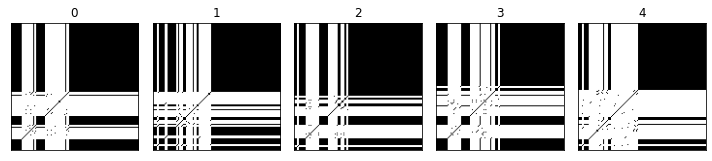

In [66]:
#benign, deface, malware, phishing, spam
fig = pyplot.figure(1, (10,10))
temp = 0
for x in range(5):
    random_labels = np.random.choice(np.where(train_y[:,x]==1)[0], size=1, replace=False)
    random_images = train_vec[random_labels]
    for img in random_images:
        temp += 1
        ax = pyplot.subplot(1,5,temp)
        ax.imshow(img.reshape(132,132,3), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(x)
        pyplot.tight_layout()

In [40]:
#model.save('cnn_model_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_model_1\assets


In [45]:
saved_model = models.load_model('cnn_model_1')

In [46]:
results = saved_model.predict(test_vec, verbose = 1)

517/517 [==============================] - 155s 300ms/step


In [47]:
results

array([[3.8409308e-03, 7.1262747e-02, 9.2472291e-01, 1.6635901e-04,
        7.0675642e-06],
       [1.6056521e-11, 9.9997711e-01, 1.3789702e-07, 2.2637822e-05,
        1.6365091e-07],
       [2.3418766e-05, 9.9989808e-01, 5.0855069e-05, 2.7404860e-05,
        2.9472568e-07],
       ...,
       [1.7614725e-06, 9.9994910e-01, 4.8992431e-05, 9.4632142e-08,
        1.0048127e-08],
       [4.5791019e-16, 1.0000000e+00, 6.7683658e-12, 1.8551216e-08,
        2.0274491e-17],
       [7.9030400e-11, 1.0000000e+00, 9.6857509e-09, 2.7208422e-09,
        3.3511541e-15]], dtype=float32)

In [48]:
y_pred = np.argmax(results, axis=1)
t_te = np.argmax(test_y, axis=1)

In [55]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

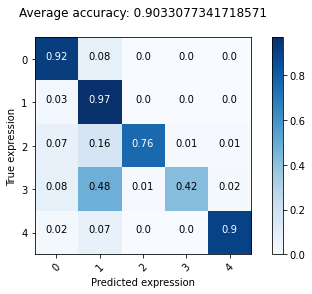

In [57]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=[0,1,2,3,4],
                      normalize=True,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')